### Importing data and the functions

In [1]:
## importing the functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as ss; ss.set()

from python_files.cell import CellNode
from python_files.cell_utils import generateLineageWithTime, separate_pop, inG1_or_G2
from python_files.parameter_estimate import GAnalytical

## Reading the data
df = pd.read_excel(r'../data/single_cellData.xlsx')
##----------------------- Preprocessing the data ------------------------##

# dataFrmae into numpy array
a = df.values

G1 = a[:, 0] # G1 for control
G2 = a[:, 1] # G2 for control

G1_lap = a[:, 3] # G1 for lapatinib
G2_lap = a[:, 4] # G2 for lapatinib



# removing nan from the array
G2 = G2[~np.isnan(G2)]
G1 = G1[~np.isnan(G1)]

G2_lap = G2_lap[~np.isnan(G2_lap)]
G1_lap = G1_lap[~np.isnan(G1_lap)]

# converting from unit of [frames] into [hours]
# every frame is every 30 minutes, so dividing the numbers by 2 gives unit of [hours]
G1 = G1/2
G2 = G2/2

G1_lap = G1_lap/2
G2_lap = G2_lap/2

## Calculating the parameters of Gamma distributions (control)
g1_a, g1_b = GAnalytical(G1)
g2_a, g2_b = GAnalytical(G2)
print('#--------- Gamma parameters for G1 and G2 (control) ----------#')
print('\n G1: \n shape parameter: ', g1_a, 'and scale parameter is: ', g1_b)
print('\n G2: \n shape parameter: ', g2_a, 'and scale parameter is: ', g2_b)
print('\n \n')

## Calculating the parameters of Gamma distributions (lopatinib)
g1_a_lap, g1_b_lap = GAnalytical(G1_lap)
g2_a_lap, g2_b_lap = GAnalytical(G2_lap)
print('#--------- Gamma parameters for G1 and G2 (lopatinib) ----------#')
print('\n G1: \n shape parameter: ', g1_a_lap, 'and scale parameter is: ', g1_b_lap)
print('\n G2: \n shape parameter: ', g2_a_lap, 'and scale parameter is: ', g2_b_lap)

# generating random variables with the estimated parameters
gm = np.random.gamma(g2_a,g2_b, 100)
gm_lap = np.random.gamma(g2_a_lap, g2_b_lap, 100)

#--------- Gamma parameters for G1 and G2 (control) ----------#

 G1: 
 shape parameter:  9.084965625769376 and scale parameter is:  1.9177922780089132

 G2: 
 shape parameter:  15.753604883780861 and scale parameter is:  1.2695506931617295

 

#--------- Gamma parameters for G1 and G2 (lopatinib) ----------#

 G1: 
 shape parameter:  1.9057101245622508 and scale parameter is:  12.184434400973615

 G2: 
 shape parameter:  1.3088417134148769 and scale parameter is:  25.07560667085548


### C) Histogram of G1 times with Gamma fit

Text(0.5, 1.0, 'Histogram for G1 with gamma distribution')

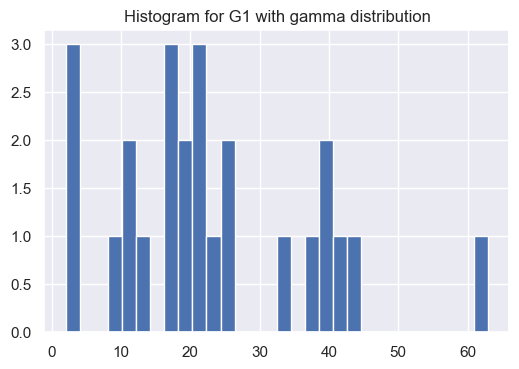

In [2]:
plt.figure(dpi=100)
plt.hist(G1_lap, bins = 30)
plt.title("Histogram for G1 with gamma distribution")

### D) Histogram of G2 times with Gamma fit

Text(0.5, 1.0, 'Histogram for G2 with gamma distribution')

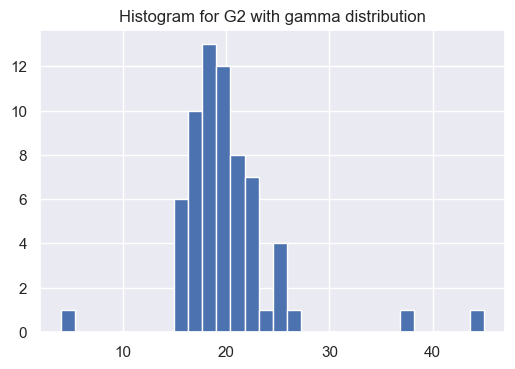

In [3]:
plt.figure(dpi = 100)
plt.hist(G2, bins = 30)
plt.title("Histogram for G2 with gamma distribution")

### E) Histogram of control vs. drug to show delay 

Text(0.5, 1.0, 'Histogram of G1 vs. G2')

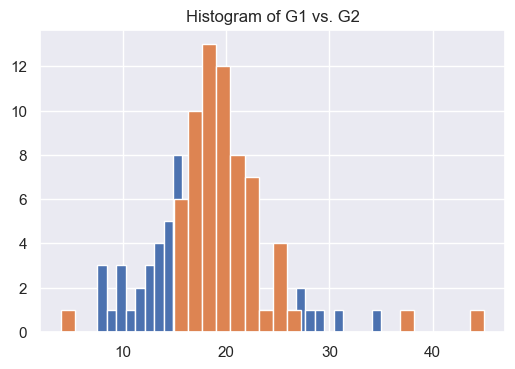

In [4]:
plt.figure(dpi = 100)
plt.hist(G1, bins = 30)
plt.hist(G2, bins = 30)
plt.title("Histogram of G1 vs. G2")